In [1]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')

In [2]:
!pip install pyspark==2.4.5

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 217.8 MB 11 kB/s s eta 0:00:01              | 66.9 MB 52.4 MB/s eta 0:00:03      | 81.8 MB 52.4 MB/s eta 0:00:03     |███████████████████▏            | 130.2 MB 67.9 MB/s eta 0:00:02��█████████████▋    | 188.0 MB 68.9 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 58.9 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=6a6aa8c210b64a26bd61e7dd540dc224f6c7d7c15fce31ce4c19662e0896029c
  Stored in directory: /tmp/wsuser/.cache/pip/

In [3]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [4]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [5]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2021-05-04 21:01:12--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2021-05-04 21:01:12--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2021-05-04 21:01:12--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [11]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView("washing")
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [12]:
spark.sql("SELECT * FROM washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [13]:
result = spark.sql("""
SELECT * from (
    SELECT
    min(temperature) over w as min_temperature,
    max(temperature) over w as max_temperature,
    min(voltage) over w as min_voltage,
    max(voltage) over w as max_voltage,
    min(flowrate) over w as min_flowrate,
    max(flowrate) over w as max_flowrate,
    min(frequency) over w as min_frequency,
    max(frequency) over w as max_frequency,
    min(hardness) over w as min_hardness,
    max(hardness) over w as max_hardness,
    min(speed) over w as min_speed,
    max(speed) over w as max_speed
    FROM washing
    WINDOW w AS (ORDER BY ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING)
)
WHERE min_temperature is not null
AND max_temperature is not null
AND min_voltage is not null
AND max_voltage is not null
AND min_flowrate is not null
AND max_flowrate is not null
AND min_frequency is not null
AND max_frequency is not null
AND min_hardness is not null
AND min_speed is not null
AND max_speed is not null
""")

In [14]:
# this is called a sliding window because we shift this window in
# the direction of increasing time stamp row by row into the fuure.
# long story short the resulting dataset has the same number of rows
# this means the aggregation functions are not applied on the complete
# table but only on hte sliding windows with are containing on 11 rows

# you are creating out of hte existing 6 features 12 new features,
# which is called feature engineering 

# the dataframes are lazy as are RDD so we have to call function
# on the new dataframe to trigger execution

In [15]:
result.count()

2051

In [ ]:
# This is a lot less than the lecture example, it is not clear how to obtain that dataset.

# this dataset has many rows removed due to the null values problem discussed above

In [17]:
result.head(10)

[Row(min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223, min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=71, max_hardness=78, min_speed=1033, max_speed=1033),
 Row(min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223, min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=72, max_hardness=78, min_speed=1033, max_speed=1033),
 Row(min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223, min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=72, max_hardness=80, min_speed=1033, max_speed=1033),
 Row(min_temperature=81, max_temperature=100, min_voltage=222, max_voltage=223, min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=74, min_hardness=72, max_hardness=80, min_speed=1033, max_speed=1046),
 Row(min_temperature=81, max_temperature=100, min_voltage=222, max_voltage=223, min_flowrate=11, max_flowrate=11, min_frequency=68, 

In [18]:
# we need to import the PCA class, since it accepts dataframes as opposed to RDD's as parameters
from pyspark.ml.feature import PCA

# spark machine learning is picky on what datatypes it accepts
# so plain Python arrays do not work, so we import this Vectors class
# we ahve to convert each Python array to a Spark machine learning vector object
from pyspark.ml.linalg import Vectors

# VectorAssembler is a helper class that converts Python arrays to spark machine 
# learning vector objects
from pyspark.ml.feature import VectorAssembler

In [19]:
# we tell the VectorAssembler to take all 12 of the input columns 
# and to create a single features column
assembler = VectorAssembler(inputCols=result.columns, outputCol='features')

In [20]:
# this line uses the new assember object to transform the input data
features = assembler.transform(result)

In [21]:
# the result is a dataframe with the original columns but also
# with an additional column called "features"
# here we directly access the rdd inside the dataframe
# and use the lambda function to upwrap the feature column

features.rdd.map(lambda r : r.features).take(10)

[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

In [24]:
# this is a list of dense vectors
# dense vector is a subtype of vector

# next we are going to reduce the dimensions of this vector from 12 to 3 so that we can plot them
# up until this point we haven't really transformed the data yet

In [23]:
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(features)

# the data still has not been transformed

In [25]:
result_pca = model.transform(features).select("pcaFeatures")
result_pca.show(truncate=False)

+-----------------------------------------------------------+
|pcaFeatures                                                |
+-----------------------------------------------------------+
|[1459.9789705814187,-18.745237781780922,70.78430794796873] |
|[1459.995481828676,-19.11343146165273,70.72738871425986]   |
|[1460.0895843561282,-20.969471062922928,70.75630600322052] |
|[1469.6993929419532,-20.403124647615513,62.013569674880955]|
|[1469.7159041892107,-20.771318327487293,61.95665044117209] |
|[1469.7128317338704,-20.790751117222456,61.896106678330966]|
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1483.5412027684088,-20.006222577501354,66.82710394284209] |
|[1483.5171090223353,-20.867020421583753,66.86707301954084] |
|[1483.4224268542928,-19.87574823665505,66.93027077913985]  |
|[1483.4

In [26]:
# in the newly created pcaFeatures column, the data has been tranformed into 3 dimensions

In [27]:
# are the number of rows still correct?

In [28]:
result_pca.count()

2051

In [29]:
# now we will extract the individual three features as python arrays

In [31]:
# in the video lesson, the instructor extracts a sample to end up with about 2000 rows
# but our data set is much smaller, so we can just take 90% of the original as a sample

#rdd = result_pca.rdd.sample(False, 0.1)
rdd = result_pca.rdd.sample(False, 0.9)

In [32]:
x = result_pca.rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[0]).collect()

In [33]:
y = result_pca.rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[1]).collect()

In [34]:
z = result_pca.rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[2]).collect()

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

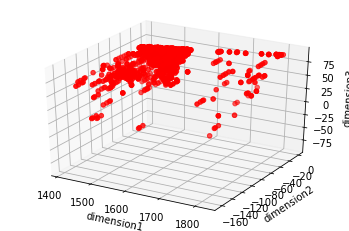

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('dimension1')
ax.set_ylabel('dimension2')
ax.set_zlabel('dimension3')

plt.show()

In [38]:
# there are clearly two clusters of points in the data set